In [1]:
!pip install snscrape
!pip install nltk


In [2]:
import snscrape.modules.twitter as sntwitter
import nltk


In [ ]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import snscrape.modules.twitter as sntwitter

def get_tweets(count):
    lang_filter = ' english'
    query = '#netflix '
    tweets = []
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query + lang_filter).get_items()):
        if i > count:
            break
        tweets.append(tweet.content)
    return tweets

    stop_words = set(stopwords.words('english'))
    filtered_tweets = []
    for tweet in tweets:
        words = word_tokenize(tweet)
        filtered_words = [word.lower() for word in words if not word.lower() in stop_words and word.isalpha()]
        filtered_tweets.append(' '.join(filtered_words))

tweets = get_tweets(10000)
for tweet in tweets:
    print(tweet)


In [ ]:
import re

text = " ".join(tweets)
# Remove URLs
text = re.sub(r"http\S+", "", text)
# Remove mentions
text = re.sub(r"@\S+", "", text)
# Remove hashtags
text = re.sub(r"#\S+", "", text)
# Remove non-alphabetic characters
text = re.sub(r"[^a-zA-Z\s]", "", text)

print(text)

with open('clean_netflix_comments.csv', 'w',encoding='utf8') as file:
    file.write(text)

In [4]:
pip install wordcloud matplotlib nltk


Note: you may need to restart the kernel to use updated packages.


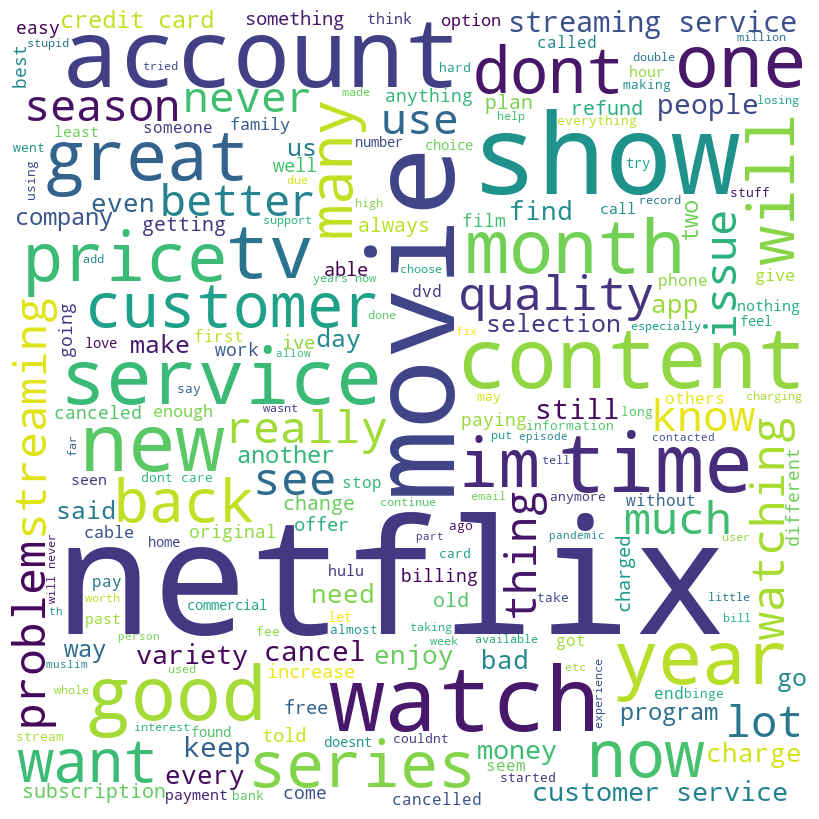

In [16]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('clean_netflix_comments.csv', 'r',encoding='utf8') as file:
    text = file.read()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()